In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [104]:
#PS4.1
# 读取csv文件
data = pd.read_csv('usgs_earthquakes.csv')
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


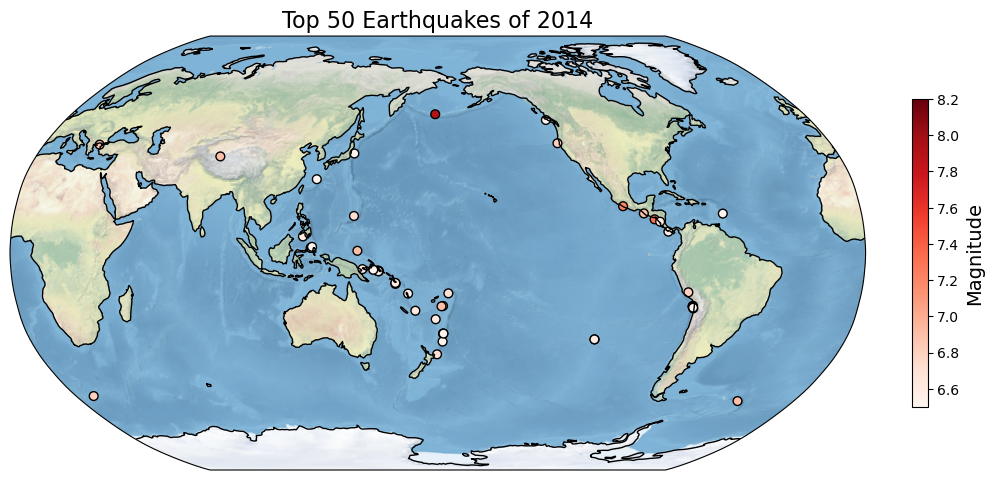

In [110]:
# 选择2014年的地震数据并按震级排序，选择前50个地震
data['time'] = pd.to_datetime(data['time'])
data_2014 = data[(data['time'] >= '2014-01-01 00:00:00') & (data['time'] < '2015-01-01 00:00:00')]
data_2014 = data_2014.sort_values(by='mag', ascending=False).head(50)

# 提取经纬度和震级数据
lats = data_2014['latitude']
lons = data_2014['longitude']
mags = data_2014['mag']

# 创建地图和图形
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
# 添加地图特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
#添加地图背景
ax.stock_img()

# 绘制地震点
scatter = ax.scatter(lons, lats, c=mags, cmap='Reds', edgecolor='black',transform=ccrs.PlateCarree(), s=40)

# 添加标题
plt.title('Top 50 Earthquakes of 2014', fontsize=16, loc='center')

# 添加颜色条
cbar = plt.colorbar(scatter, orientation='vertical', fraction=0.03, pad=0.05,shrink=0.5)
cbar.set_label('Magnitude',fontsize=14)
cbar.set_ticks(np.arange(6.6,8.3, 0.2))
plt.show()

In [4]:
# PS4.2
ds = xr.open_dataset("MERRA2_400.tavg1_2d_rad_Nx.20221126.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:      (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon          (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat          (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time         (time) datetime64[ns] 2022-11-26T00:30:00 ... 2022-11-26T23:...
Data variables: (12/36)
    ALBEDO       (time, lat, lon) float32 ...
    ALBNIRDF     (time, lat, lon) float32 ...
    ALBNIRDR     (time, lat, lon) float32 ...
    ALBVISDF     (time, lat, lon) float32 ...
    ALBVISDR     (time, lat, lon) float32 ...
    CLDHGH       (time, lat, lon) float32 ...
    ...           ...
    SWTNTCLRCLN  (time, lat, lon) float32 ...
    TAUHGH       (time, lat, lon) float32 ...
    TAULOW       (time, lat, lon) float32 ...
    TAUMID       (time, lat, lon) float32 ...
    TAUTOT       (time, lat, lon) float32 ...
    TS           (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Tue Dec  6 22...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_rad_Nx.20221126.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/Q9QMY5PBNV1T
    RangeBeginningDate:                2022-11-26
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2022-11-26
    RangeEndingTime:                   23:59:59.000000

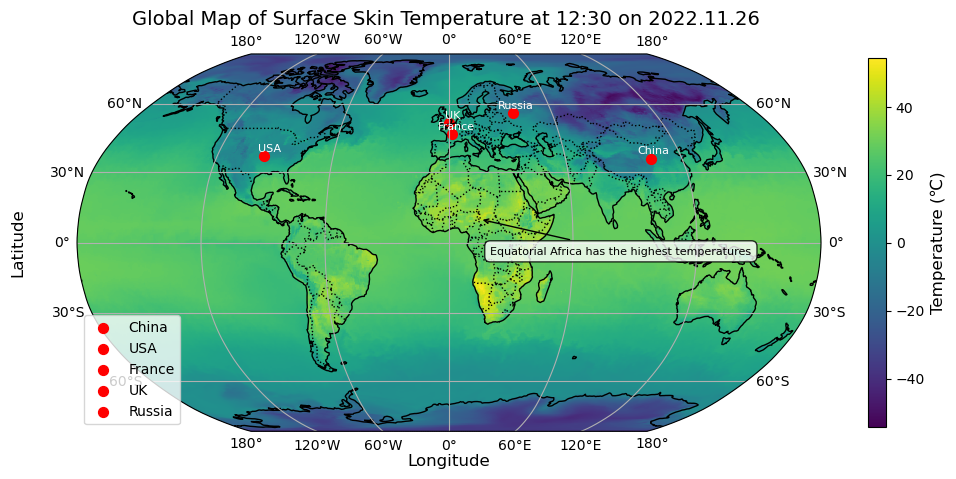

In [112]:
# PS4.2.1
# 提取surface_skin_temperature,TS
ts = ds['TS'].sel(time='2022-11-26T12:30:00')-273.15

# 创建全球地图
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# 绘制变量
plot=ts.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', add_colorbar=False)

# 添加地图特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)
ax.stock_img()

# 示例国家的经纬度位置
countries = {
    'China': (35.8617, 104.1954),  # 中国
    'USA': (37.0902, -95.7129),   # 美国
    'France': (46.6034, 1.8883),  # 法国
    'UK':(51.5, 0.1),  #英国
    'Russia':(56, 37.5) #俄罗斯
}
# 在地图上标记国家位置
for country, (lat, lon) in countries.items():
    plt.scatter(lon, lat, color='red', marker='o', s=50, label=country, transform=ccrs.PlateCarree())
    plt.text(lon + 2, lat + 2, country, color='WHITE', fontsize=8, ha='center', transform=ccrs.PlateCarree())

#添加注释
annotation = f'Equatorial Africa has the highest temperatures'
plt.annotate(annotation, xy=(15, 10), xytext=(20, -5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'), fontsize=8, ha='left',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'), transform=ccrs.PlateCarree())    

# 显示颜色条
cbar = plt.colorbar(plot, orientation='vertical', pad=0.05,shrink=0.6)
cbar.set_label('Temperature (℃)',fontsize=12)  

# 设置标题和标签
plt.title('Global Map of Surface Skin Temperature at 12:30 on 2022.11.26 ',fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.text(0.5, -0.08, 'Longitude', ha='center', va='center',fontsize=12, transform=ax.transAxes)
plt.text(-0.08, 0.5, 'Latitude', ha='center', va='center',fontsize=12, rotation='vertical', transform=ax.transAxes)

#添加图例
plt.legend(loc='lower left')

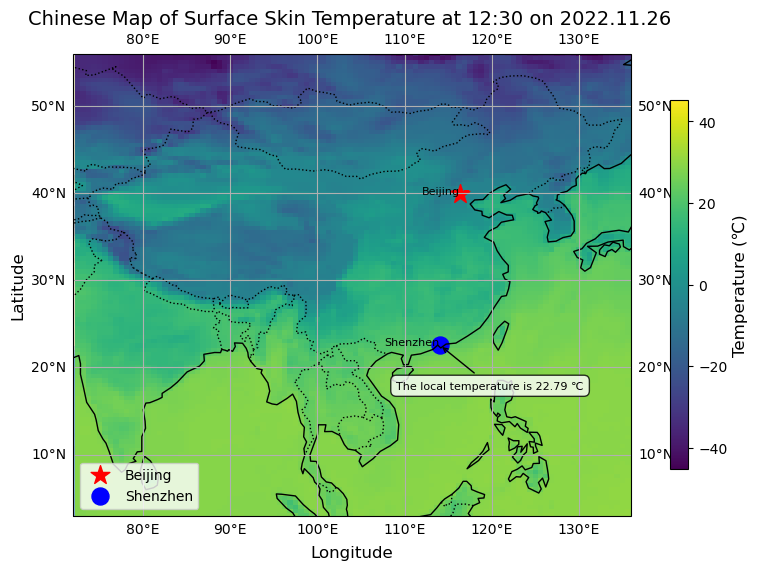

In [90]:
#PS4.2.2
ts = ds['TS'].sel(time='2022-11-26T12:30:00').sel(lat=slice(3, 56), lon=slice(72, 136))-273.15
# 创建区域地图
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 绘制中国区域地图
plot=ts.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', add_colorbar=False)
ax.set_extent([72, 136, 3, 56], crs=ccrs.PlateCarree())

# 添加地图特征
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)
ax.stock_img()

# 在地图上标记北京和深圳的位置
beijing_coords = [116.3975, 39.9042]  # 北京的经纬度
shenzhen_coords = [114.0579, 22.5431]  # 深圳的经纬度
plt.scatter(beijing_coords[0], beijing_coords[1], color='red', marker='*', s=200, label='Beijing', transform=ccrs.PlateCarree())
plt.scatter(shenzhen_coords[0], shenzhen_coords[1], color='blue', marker='o',s=150, label='Shenzhen', transform=ccrs.PlateCarree())

# 添加北京和深圳的地名标签
plt.text(beijing_coords[0], beijing_coords[1], 'Beijing', color='black', fontsize=8, ha='right', transform=ccrs.PlateCarree())
plt.text(shenzhen_coords[0], shenzhen_coords[1], 'Shenzhen', color='black', fontsize=8, ha='right', transform=ccrs.PlateCarree())

# 从深圳位置获取温度数据
temperature_shenzhen = float(ts.sel(lon=shenzhen_coords[0], lat=shenzhen_coords[1], method='nearest').values)
# 创建深圳的文本框注释
shenzhen_annotation = f"The local temperature is {temperature_shenzhen:.2f} ℃"
plt.annotate(shenzhen_annotation, xy=(shenzhen_coords[0], shenzhen_coords[1]), xytext=(shenzhen_coords[0] - 5, shenzhen_coords[1] - 5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'), fontsize=8, ha='left',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'), transform=ccrs.PlateCarree())

# 显示颜色条
cbar = plt.colorbar(plot, orientation='vertical', pad=0.05,shrink=0.8)
cbar.set_label('Temperature (℃)',fontsize=12)  # 颜色条标题
cbar.ax.yaxis.set_label_position('right')  

# 设置标题和标签
plt.title('Chinese Map of Surface Skin Temperature at 12:30 on 2022.11.26 ',fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.text(0.5, -0.08, 'Longitude', ha='center', va='center', fontsize = 12, transform=ax.transAxes)
plt.text(-0.1, 0.5, 'Latitude', ha='center', va='center', fontsize = 12, rotation='vertical', transform=ax.transAxes)

#添加图例
plt.legend(loc='lower left')